# Addendum

We noted that the priors were too tight, and the number of iterations too small, in our original analysis. Here we analyse the results of a slightly longer chain with looser priors.

In [41]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import corner
import pandas as pd
import emcee
import tqdm

import cosmo_helpers as ch

In [42]:
# Load Planck 2018 data
data_file = '~/physics/COM_PowerSpect_CMB-TT-full_R3.01_with_header.txt'
data = pd.read_csv(data_file, sep='\s+', comment='#')
data = data.head(2499)

In [43]:
# Load MCMC results
previous_mcmc_file = 'cosmo_mcmc_optimized.csv' #This is actually the new file, I just didn't want to update the variable name throughout the notebook
previous_mcmc = pd.read_csv(previous_mcmc_file)

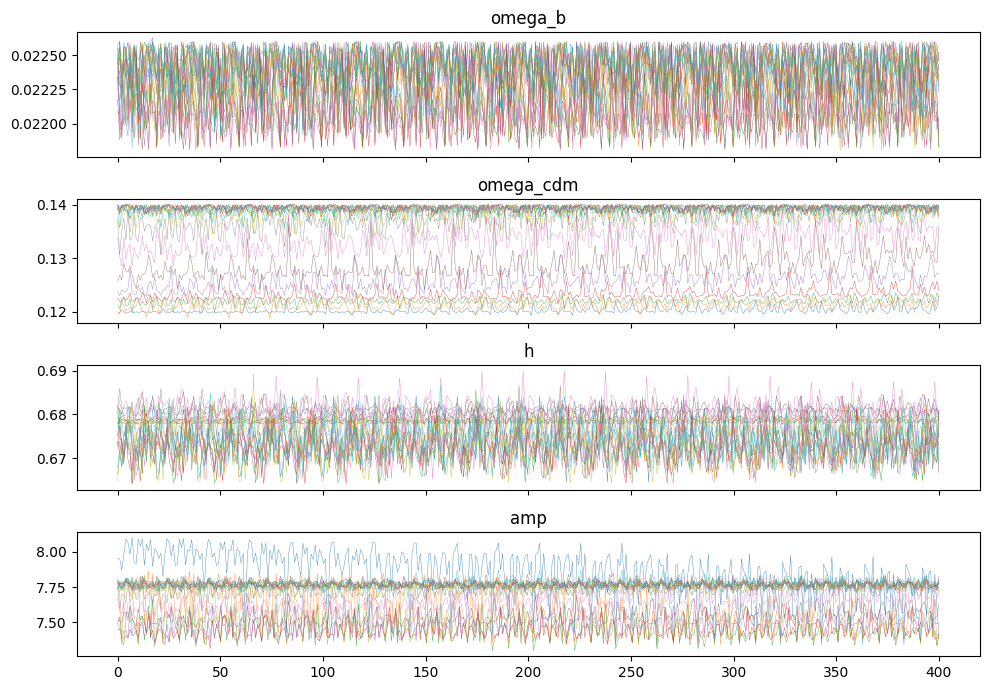

In [44]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 7), sharex=True)
n_walkers = 20
walkers = np.ones(n_walkers)

chain_length = int(len(previous_mcmc)/n_walkers)
iterations = np.linspace(0, chain_length, chain_length)

for n, walker in enumerate(walkers):
    ax0.plot(iterations, previous_mcmc['omega_b'][n*chain_length:(n+1)*chain_length], label='omega_b', lw=0.25)
    ax1.plot(iterations,previous_mcmc['omega_cdm'][n*chain_length:(n+1)*chain_length], label='omega_cdm', lw=0.25)
    ax2.plot(iterations,previous_mcmc['h'][n*chain_length:(n+1)*chain_length], label='h', lw=0.25)
    ax3.plot(iterations,previous_mcmc['amp'][n*chain_length:(n+1)*chain_length], label='amp', lw=0.25)
ax0.set_title('omega_b')
ax1.set_title('omega_cdm')
ax2.set_title('h')
ax3.set_title('amp')
plt.tight_layout()

In [45]:
Dls = data['Dl']
ls = data['l']

def plotter(data,ls = ls, dls=Dls):
    plt.ion()
    plt.plot(ls, dls,label="$D_l^{TT}$")
    # for n, theta in enumerate(samples[np.random.randint(len(samples), size=20)]):
    for n, theta in enumerate(data['h'][np.random.randint(len(data['h']), size=100)]):
        if (data['lnprob'][n] > -np.inf):
            theta = [data['omega_b'][n], data['omega_cdm'][n], data['h'][n], data['amp'][n]]
            Dls = ch.get_Dls(theta)
            plt.plot(ls, Dls, color="r", alpha=0.1)
        #If this set of parameters isn't allowed, do nothing
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('l')
    plt.ylabel("$D_l^{TT}$")
    plt.legend()
    plt.show()

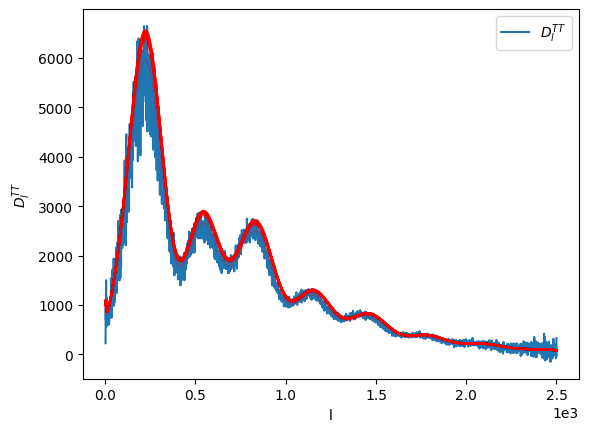

In [46]:
plotter(previous_mcmc)

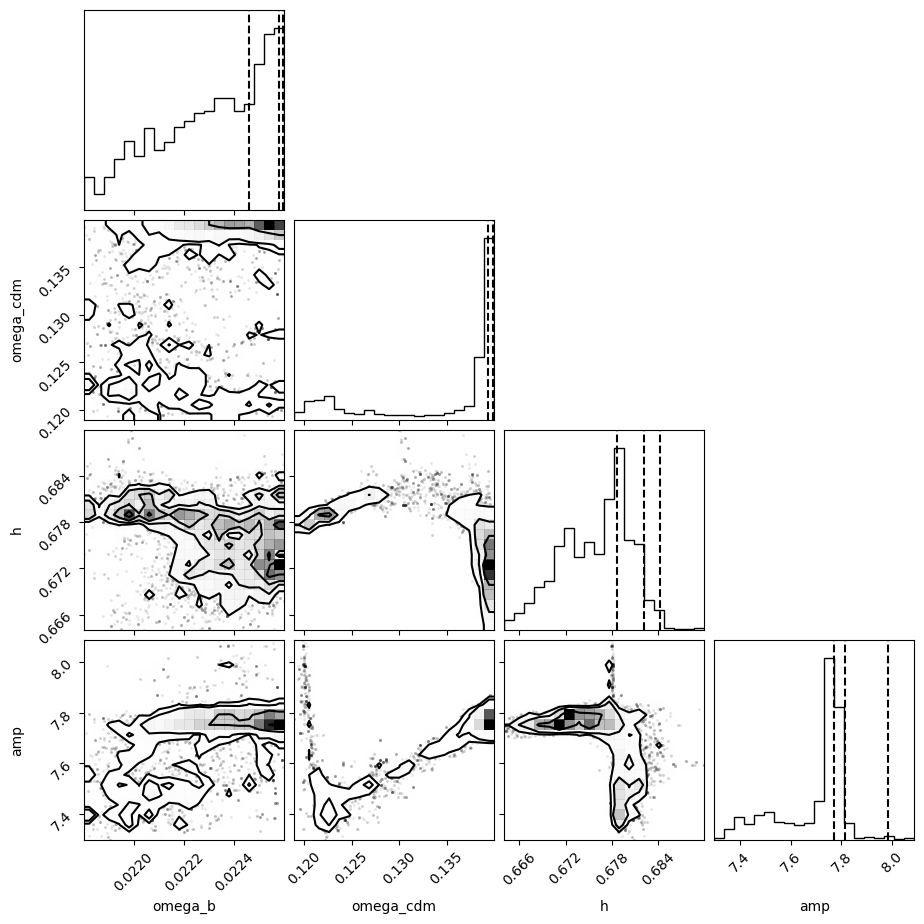

In [48]:
labels = ['omega_b', 'omega_cdm', 'h', 'amp']
corner_data = previous_mcmc[labels][50:]
fig = corner.corner(corner_data, show_titles=False, labels=labels, plot_datapoints = True, quantiles=[0.68, 0.95, 0.99])

In [60]:
default_params = Class()
default_params.set({'output':'tCl, lCl', 'lensing':'yes'})
default_params.compute()
ells = default_params.lensed_cl(2500)['ell'][2:]
dls_default_params = (10**12)*default_params.lensed_cl(2500)['tt'][2:]*ells*(ells+1)

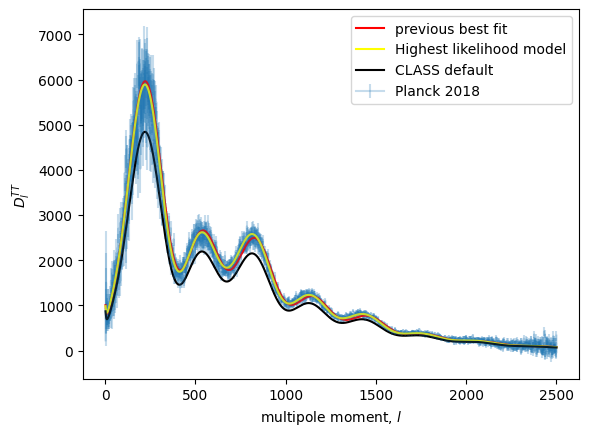

In [61]:
# Check CLASS' solution for the standard set of parameters against the PLANCK data
errorbars = [data['-dDl'], data['+dDl']]
plt.errorbar(data['l'], data['Dl'], errorbars, label='Planck 2018', alpha=0.25)
theta_cdm = [0.0223828, 0.1201075, 0.67810, 1]

# dls = ch.get_Dls(theta_cdm)#*10**12.85# We're probably missing a unit conversion here
# plt.plot(ls, dls, label='Model')

# theta_cdm_amped = [0.0223828, 0.1201075, 0.67810, 2*np.pi]
# dls_amped = ch.get_Dls(theta_cdm_amped)# Add an amplitude correction here
# plt.plot(ls, dls_amped, label='Model with manual amplitude correction')

theta_max_old = [0.02220314, 0.12199268, 0.6839379 , 7.42369534]
dls_bf_old = ch.get_Dls(theta_max_old)
plt.plot(ls, dls_bf_old, label='previous best fit', color='red', alpha=1.)

max_index = np.argmax(previous_mcmc['lnprob'])
theta_max = [previous_mcmc['omega_b'][max_index], previous_mcmc['omega_cdm'][max_index], previous_mcmc['h'][max_index], previous_mcmc['amp'][max_index]]
dls_bf = ch.get_Dls(theta_max)
plt.plot(ls, dls_bf, label='Highest likelihood model', color='yellow', alpha=1.)

plt.plot(ls, dls_default_params, label='CLASS default', color='black', alpha=1.)

plt.xlabel("multipole moment, $l$")
plt.ylabel("$D_l^{TT}$")
plt.legend()

In [56]:
print(np.max(previous_mcmc['lnprob']))
previous_max =-480.754269235625
new_max = np.max(previous_mcmc['lnprob'])

print(np.exp(new_max-previous_max))

-339.5126376370192
2.1900862485861283e+61
